<a href="https://colab.research.google.com/github/hiydavid/tfdev_learning/blob/main/ZTM/notebooks/tfdev_exercise_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 01: Neural Network Regression

---

## 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

In [1]:
# load library
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

tf.random.set_seed(42)

In [25]:
# get data
diamonds = pd.read_csv(
    "https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv"
)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [26]:
# rename
diamonds.columns = ['carat', 'cut', 'color', 'clarty', 'depth', 'table',
                    'price', 'length_mm', 'width_mm', 'depth_mm']

In [27]:
# set X and y
X = diamonds.drop("price", axis=1)
y = diamonds["price"]

In [28]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

len(X_train), len(X_test)

(43152, 10788)

In [29]:
# see shape
X_train.shape, y_train.shape

((43152, 9), (43152,))

In [30]:
# feature columns
num_features = ['carat', 'depth', 'table', 'length_mm', 'width_mm', 'depth_mm']
cat_features = ['cut', 'color', 'clarty']

In [31]:
# transform features
ct = make_column_transformer(
    (MinMaxScaler(), num_features),
    (OneHotEncoder(handle_unknown="ignore"), cat_features)
)

ct.fit(X_train)
X_train_transformed = ct.transform(X_train)
X_test_transformed = ct.transform(X_test)

In [32]:
# build and fit model
diamonds_model_0 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

diamonds_model_0.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

history_0 = diamonds_model_0.fit(
    X_train_transformed, y_train, epochs=10, verbose=1
)

Epoch 1/10
1349/1349 [==============================] - 5s 3ms/step - loss: 2928.3926 - mae: 2928.3926
Epoch 2/10
1349/1349 [==============================] - 5s 4ms/step - loss: 2407.8193 - mae: 2407.8193
Epoch 3/10
1349/1349 [==============================] - 7s 5ms/step - loss: 2170.4905 - mae: 2170.4905
Epoch 4/10
1349/1349 [==============================] - 6s 5ms/step - loss: 1784.7466 - mae: 1784.7466
Epoch 5/10
1349/1349 [==============================] - 5s 4ms/step - loss: 1180.7327 - mae: 1180.7327
Epoch 6/10
1349/1349 [==============================] - 6s 4ms/step - loss: 791.3354 - mae: 791.3354
Epoch 7/10
1349/1349 [==============================] - 4s 3ms/step - loss: 585.5847 - mae: 585.5847
Epoch 8/10
1349/1349 [==============================] - 4s 3ms/step - loss: 484.9992 - mae: 484.9992
Epoch 9/10
1349/1349 [==============================] - 4s 3ms/step - loss: 432.1669 - mae: 432.1669
Epoch 10/10
1349/1349 [==============================] - 5s 4ms/step - loss: 402.

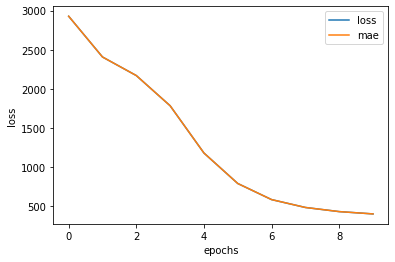

In [33]:
# view more
pd.DataFrame(history_0.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [34]:
# evaluate
diamonds_model_0.evaluate(X_test_transformed, y_test)

338/338 [==============================] - 1s 3ms/step - loss: 386.8558 - mae: 386.8558


[386.8558044433594, 386.8558044433594]

In [35]:
# baseline
abs(y_test - y_train.mean()).mean()

3020.5058390529375

---

## 2.Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [36]:
# add layers
diamonds_model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1),
])

diamonds_model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

history_1 = diamonds_model_1.fit(
    X_train_transformed, y_train, epochs=10, verbose=1
)

Epoch 1/10
1349/1349 [==============================] - 5s 4ms/step - loss: 1172.6581 - mae: 1172.6581
Epoch 2/10
1349/1349 [==============================] - 5s 3ms/step - loss: 366.3678 - mae: 366.3678
Epoch 3/10
1349/1349 [==============================] - 5s 4ms/step - loss: 354.7260 - mae: 354.7260
Epoch 4/10
1349/1349 [==============================] - 5s 4ms/step - loss: 347.9203 - mae: 347.9203
Epoch 5/10
1349/1349 [==============================] - 5s 3ms/step - loss: 345.7252 - mae: 345.7252
Epoch 6/10
1349/1349 [==============================] - 5s 3ms/step - loss: 343.4268 - mae: 343.4268
Epoch 7/10
1349/1349 [==============================] - 5s 3ms/step - loss: 342.8623 - mae: 342.8623
Epoch 8/10
1349/1349 [==============================] - 5s 3ms/step - loss: 340.8767 - mae: 340.8767
Epoch 9/10
1349/1349 [==============================] - 5s 3ms/step - loss: 339.5676 - mae: 339.5676
Epoch 10/10
1349/1349 [==============================] - 5s 3ms/step - loss: 340.5694 - m

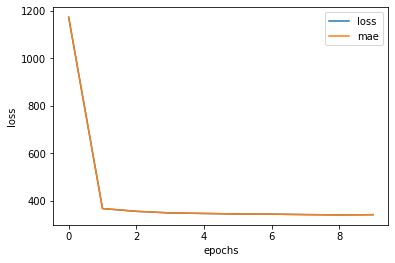

In [37]:
# view more
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [38]:
# evaluate
diamonds_model_1.evaluate(X_test_transformed, y_test)

338/338 [==============================] - 1s 3ms/step - loss: 335.2308 - mae: 335.2308


[335.23077392578125, 335.23077392578125]

---

## 3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?

---

## 4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow `tf.keras.datasets` and model it.

In [39]:
# get dataset
boston = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=42
)

In [40]:
# see fataset
X_train, y_train = boston[0]
X_test, y_test = boston[1]

len(X_train), len(X_test)

(404, 102)

In [41]:
# build and fit model
boston_model_0 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

boston_model_0.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

history_boston = boston_model_0.fit(
    X_train, y_train, epochs=10, verbose=1
)

Epoch 1/10
13/13 [==============================] - 0s 4ms/step - loss: 87.1552 - mae: 87.1552
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 35.0460 - mae: 35.0460
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 17.7694 - mae: 17.7694
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 8.9776 - mae: 8.9776
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 6.4737 - mae: 6.4737
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 6.0329 - mae: 6.0329
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 6.0216 - mae: 6.0216
Epoch 8/10
13/13 [==============================] - 0s 3ms/step - loss: 5.6790 - mae: 5.6790
Epoch 9/10
13/13 [==============================] - 0s 3ms/step - loss: 5.5382 - mae: 5.5382
Epoch 10/10
13/13 [==============================] - 0s 4ms/step - loss: 5.1849 - mae: 5.1849


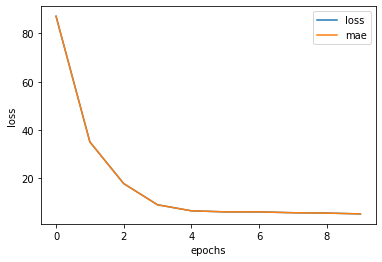

In [42]:
# view more
pd.DataFrame(history_boston.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [43]:
# evaluate
boston_model_0.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 5.2394 - mae: 5.2394


[5.239433288574219, 5.239433288574219]

In [44]:
# baseline
abs(y_test - y_train.mean()).mean()

5.911788973014949